# 1D Scattering Matrix

This example illutrates the use of the scattering matrix in a simple 1D case. Two example are provided:

1. **Bragg Grating**: Transmission, reflection and band structure of a simple Bragg Grating.
2. **Solar Cell**: Calculation of absorption in a simple solar cell. 


## Import required packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import A_FMM

## Bragg Grating

This section analyze the behavior of a 1D Bragg Grating. The grating is built by a periodic repetition of 2 transparent materials (dielectric constant 12.0 and 2.0, respectively). The duty cycle of the grating is 50% and everything is calculated in dimensionless units (or, equivalently, the period of the grating is set to 1).

### Transmission and reflection from a finite multilayer

**Building the structure**

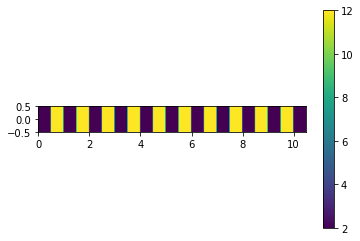

In [11]:
lay1 = A_FMM.layer_uniform(0,0,2.0)
lay2 = A_FMM.layer_uniform(0,0,12.0)

mat = 10*[lay1, lay2] + [lay1]
d   = 10*[0.5, 0.5]   + [0.5]

st = A_FMM.stack(mat, d)
st.count_interface()
st.plot_stack()
plt.show()

**Transmission and reflection at normal incidence**

In [19]:
oml = np.linspace(0.0005, 0.6,1200)
DATA = []
for om in oml:
    st.solve(om)
    T,R = st.get_T(0,0, ordered = False), st.get_R(0,0, ordered = False)
    DATA.append((T,R))
    
DATA = pd.DataFrame(DATA, index = oml, columns = ['T', 'R'])
DATA

,T,R
0.0005,0.996932,0.003068
0.0010,0.987923,0.012077
0.0015,0.973529,0.026471
0.0020,0.954594,0.045406
0.0025,0.932147,0.067853
...,...,...
0.5980,0.089791,0.910209
0.5985,0.074259,0.925741
0.5990,0.061775,0.938225
0.5995,0.051697,0.948303


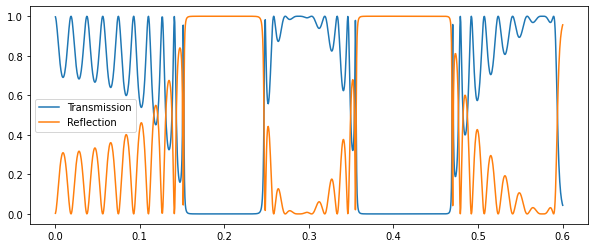

In [20]:
plt.figure(figsize = (10,4))
plt.plot(DATA['T'], label = 'Transmission')
plt.plot(DATA['R'], label = 'Reflection')
plt.legend()

**Transmission and reflection at an angle**

In [34]:
oml = np.linspace(0.002, 0.6,300)
angles = np.linspace(0,90,91)
DATA = []
for om in oml:
    for angle in angles:
        st.solve(om, kx = om*np.sqrt(2.0)*np.sin(np.pi*angle/180.0))
        RE, TE, RM, TM = st.get_R(1,1,ordered=False), st.get_T(1,1,ordered=False), st.get_R(0,0,ordered=False), st.get_T(0,0,ordered=False) 
        DATA.append((om, angle, RE, TE, RM, TM))
        
DATA = pd.DataFrame(DATA, columns = ['om', 'angle', 'R_TE', 'T_TE', 'R_TM', 'T_TM'])  
DATA

/home/marco/Documents/MyPrograms/A_FMM/A_FMM/scattering.py:75: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(self.S21[j2,j1])**2*lay.P_norm[j2]/lay.P_norm[j1]
/home/marco/Documents/MyPrograms/A_FMM/A_FMM/scattering.py:60: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(self.S11[j2,j1])**2*lay2.P_norm[j2]/lay1.P_norm[j1]


,om,angle,R_TE,T_TE,R_TM,T_TM
0,0.002,0.0,0.045406,9.545935e-01,0.045406,0.954594
1,0.002,1.0,0.045420,9.545802e-01,0.045389,0.954611
2,0.002,2.0,0.045460,9.545401e-01,0.045337,0.954663
3,0.002,3.0,0.045527,9.544732e-01,0.045251,0.954749
4,0.002,4.0,0.045621,9.543794e-01,0.045130,0.954870
...,...,...,...,...,...,...
27295,0.600,86.0,1.000000,7.286253e-12,0.999778,0.000222
27296,0.600,87.0,1.000000,3.555652e-12,0.999899,0.000101
27297,0.600,88.0,1.000000,1.428415e-12,0.999962,0.000038
27298,0.600,89.0,1.000000,3.361567e-13,0.999991,0.000009


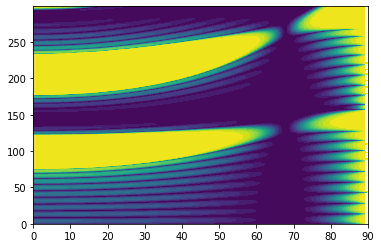

In [33]:
OM, ANG = np.meshgrid(oml, angles, indexing = 'ij')
plt.contourf(DATA.pivot('om', 'angle', 'R_TE'), levels = 21)

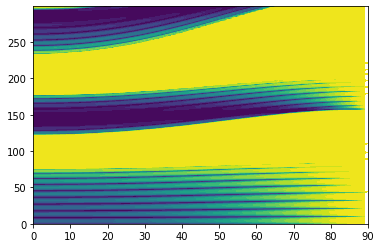

In [32]:
plt.contourf(DATA.pivot('om', 'angle', 'R_TM'), levels = 21)

### Band structure infinite Bragg Grating